In [1]:
%cd /content/drive/MyDrive/DS3/
!ls -la 

/content/drive/MyDrive/DS3
total 55
-rw------- 1 root root   494 Dec  3 01:18 attacks.py
drwx------ 2 root root  4096 Dec  2 23:27 data
-rw------- 1 root root 30127 Dec  3 01:17 DS3.ipynb
-rw------- 1 root root  8012 Dec  3 01:19 model.py
drwx------ 2 root root  4096 Dec  2 23:26 models
drwx------ 2 root root  4096 Dec  2 23:49 __pycache__
-rw------- 1 root root  2937 Nov 22 13:01 test_project.py
-rw------- 1 root root  1323 Dec  3 01:18 utils.py


In [ ]:
!python model.py --force-train

Training model
models/default_model.pth
170499072it [00:11, 14668433.98it/s]                   
Extracting ./data/cifar-10-python.tar.gz to ./data/
Starting training
epoch [1/10] --- loss : 1.348006
epoch [2/10] --- loss : 1.270573
epoch [3/10] --- loss : 1.164394
epoch [4/10] --- loss : 1.096320
epoch [5/10] --- loss : 0.806335
epoch [6/10] --- loss : 0.892042
epoch [7/10] --- loss : 0.990212
epoch [8/10] --- loss : 1.072817
epoch [9/10] --- loss : 1.336983
epoch [10/10] --- loss : 0.721291
Model saved in models/default_model.pth
Model save to 'models/default_model.pth'.
Testing with model from 'models/default_model.pth'. 
Files already downloaded and verified
Model natural accuracy (valid): 57.8125


Files already downloaded and verified


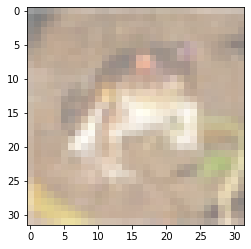

Label :   frog
Prediction : frog


In [ ]:
%run model.py

In [ ]:
!python model.py

Files already downloaded and verified
Model Attacked accuracy (valid): [57.8125, 29.443359375, 19.661458333333332, 14.8681640625, 11.9921875, 10.107421875, 8.761160714285714, 7.75146484375, 6.987847222222222, 6.396484375, 5.921519886363637, 5.56640625, 5.265925480769231, 5.029296875, 4.830729166666667, 4.6875, 4.566865808823529, 4.470486111111111, 4.3842516447368425, 4.306640625]


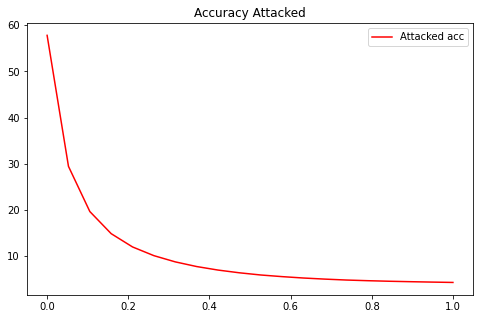

In [8]:
import numpy as np
import matplotlib.pyplot as plt


def plot_accuracies(epsilons,acc):
    fig,ax = plt.subplots(1,1)
    fig.set_size_inches((8,5))
    ax.plot(epsilons, acc,'r',label = 'Attacked acc')
    ax.set_title(f'Accuracy Attacked')
    ax.legend()
    fig.show()

epsilons = np.linspace(0,1,20)
acc = [57.8125, 29.443359375, 19.661458333333332, 14.8681640625, 11.9921875, 10.107421875, 8.761160714285714, 7.75146484375, 6.987847222222222, 6.396484375, 5.921519886363637, 5.56640625, 5.265925480769231, 5.029296875, 4.830729166666667, 4.6875, 4.566865808823529, 4.470486111111111, 4.3842516447368425, 4.306640625]

plot_accuracies(epsilons,acc)

In [11]:
!python model.py

Files already downloaded and verified
Model Attacked accuracy (valid): [57.8125, 28.90625, 19.270833333333332, 14.453125, 11.5625, 9.635416666666666, 8.258928571428571, 7.2265625, 6.423611111111111, 5.78125, 5.255681818181818, 4.817708333333333, 4.447115384615385, 4.129464285714286, 3.8541666666666665, 3.61328125, 3.400735294117647, 3.2118055555555554, 3.0427631578947367, 2.890625]


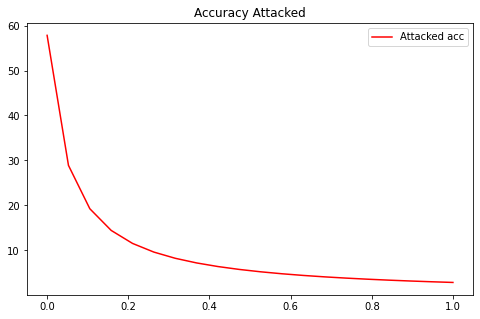

In [12]:
epsilons = np.linspace(0,1,20)
acc = [57.8125, 28.90625, 19.270833333333332, 14.453125, 11.5625, 9.635416666666666, 8.258928571428571, 7.2265625, 6.423611111111111, 5.78125, 5.255681818181818, 4.817708333333333, 4.447115384615385, 4.129464285714286, 3.8541666666666665, 3.61328125, 3.400735294117647, 3.2118055555555554, 3.0427631578947367, 2.890625]

plot_accuracies(epsilons,acc)



In [17]:
def plot_accuracies_attacks(epsilons,attacks=None,titles=['FGSM_attack','PGD_attack'],colors=['r','g']):
    fig,ax = plt.subplots(1,1)
    fig.set_size_inches((8,5))
    for k in range(len(attacks)):
        ax.plot(epsilons, attacks[k],colors[k],label = f'{titles[k]} Accuracy')
        ax.set_title(f'Accuracy Attacked')
        ax.legend()
        fig.show()

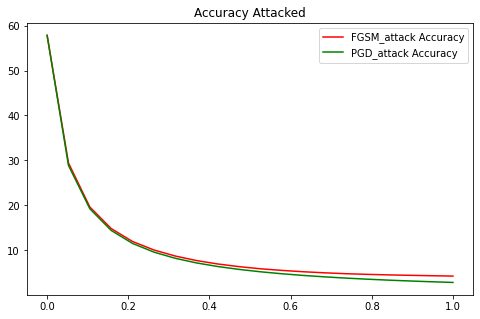

In [18]:

epsilons = np.linspace(0,1,20)
acc_fgsm = [57.8125, 29.443359375, 19.661458333333332, 14.8681640625, 11.9921875, 10.107421875, 8.761160714285714, 7.75146484375, 6.987847222222222, 6.396484375, 5.921519886363637, 5.56640625, 5.265925480769231, 5.029296875, 4.830729166666667, 4.6875, 4.566865808823529, 4.470486111111111, 4.3842516447368425, 4.306640625]
acc_pgd = [57.8125, 28.90625, 19.270833333333332, 14.453125, 11.5625, 9.635416666666666, 8.258928571428571, 7.2265625, 6.423611111111111, 5.78125, 5.255681818181818, 4.817708333333333, 4.447115384615385, 4.129464285714286, 3.8541666666666665, 3.61328125, 3.400735294117647, 3.2118055555555554, 3.0427631578947367, 2.890625]

plot_accuracies_attacks(epsilons,[acc_fgsm,acc_pgd])